<a href="https://colab.research.google.com/github/martinagonz/Pokemon/blob/main/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Pokémon
Martina Gonzalez\
Raquel Rehbein

Importar las librerías Antes de empezar vamos a importar las siguientes librerías:

numpy: El popular paquete matemático de Python, se utiliza tanto que mucha gente ya lo considera parte integral del lenguaje. Nos proporciona algunas funciones estadísticas que podemos aplicar fácilmente sobre los arrays de Numpy.

matplotlib: Es la librería más popular en Python para visualizaciones y gráficos. Ella nos va a permitir realizar los gráficos de las distintas distribuciones de datos.

seaborn: Esta librería es un complemento ideal de matplotlib para realizar gráficos estadísticos.

pandas: Esta es la librería más popular para análisis de datos y financieros. Posee algunas funciones muy útiles para realizar estadística descriptiva sobre nuestros datos y nos facilita sobremanera el trabajar con series de tiempo.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")
df.head(10)

Saving Pokemon.csv to Pokemon.csv


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


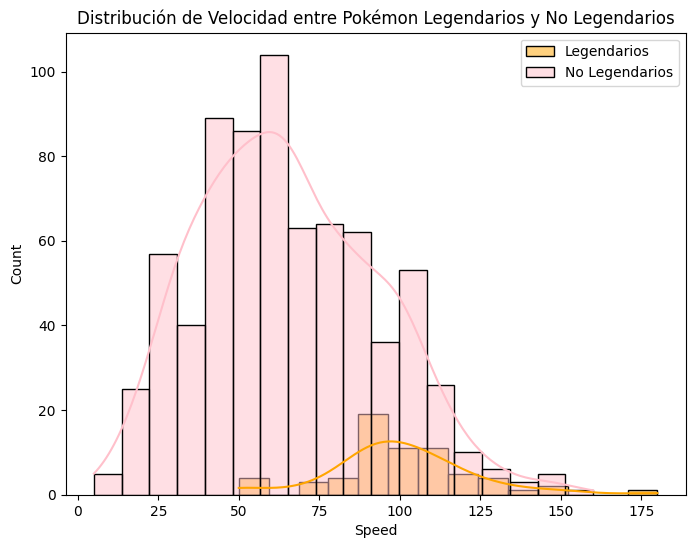

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df["Legendary"]==True]["Speed"], color="orange", label="Legendarios", kde=True)
sns.histplot(df[df["Legendary"]==False]["Speed"], color="pink", label="No Legendarios", kde=True)
plt.legend()
plt.title("Distribución de Velocidad entre Pokémon Legendarios y No Legendarios")
plt.show()


 La distribución de la velocidad para los Pokémon legendarios (en naranja) está desplazada hacia la derecha en comparación con la de los no legendarios. Esto indica que, en general, los Pokémon legendarios tienden a tener una mayor velocidad. En general, el gráfico confirma que los Pokémon legendarios tienden a tener una mayor velocidad en comparación con los Pokémon no legendarios. Esto tiene sentido, ya que los Pokémon legendarios suelen ser más raros y poderosos en el juego, y una mayor velocidad puede ser una ventaja significativa en las batallas.

In [ ]:
def bar_plot(variable):
    """
        input: variable (Ejemplo: "Type 1")
        output: Gráfico de barras & Conteo de valores
    """
    var = df[variable].dropna()  # Eliminar valores nulos
    varValue = var.value_counts()

    plt.figure(figsize=(10, 4))
    plt.bar(varValue.index, varValue, color="skyblue")
    plt.xticks(rotation=90)  # Rotar etiquetas para mejor lectura
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {variable}")
    plt.show()

    print(f"{variable}:\n{varValue}\n")



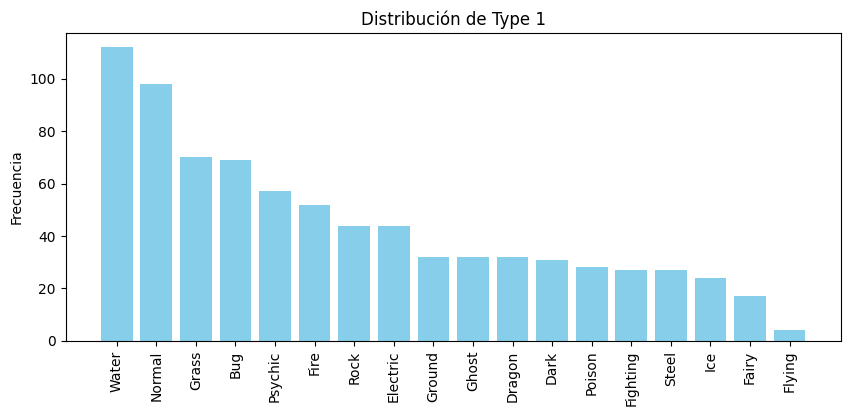

Type 1:
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64



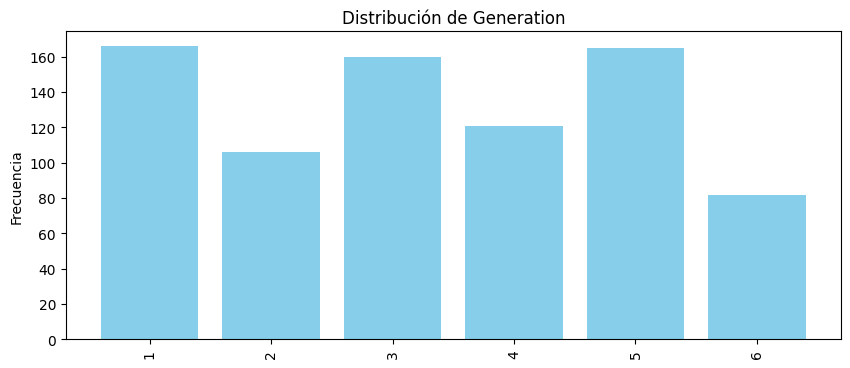

Generation:
Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64



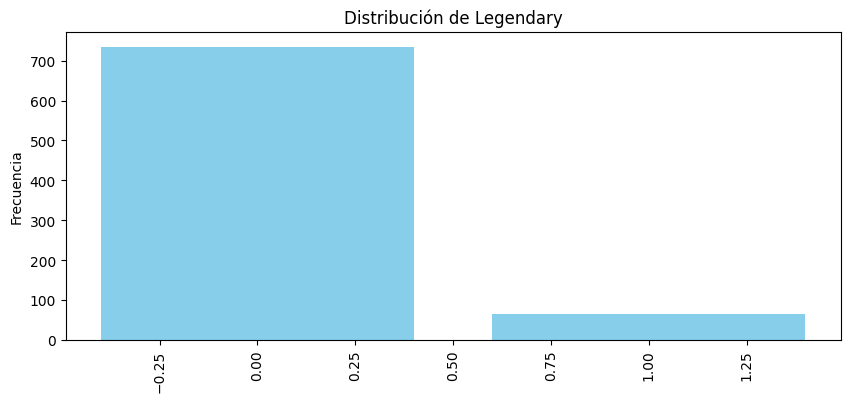

Legendary:
Legendary
False    735
True      65
Name: count, dtype: int64



In [ ]:
categorias = [ "Type 1",  "Generation", "Legendary"]

# Aplicar la función a cada categoría
for c in categorias:
    bar_plot(c)

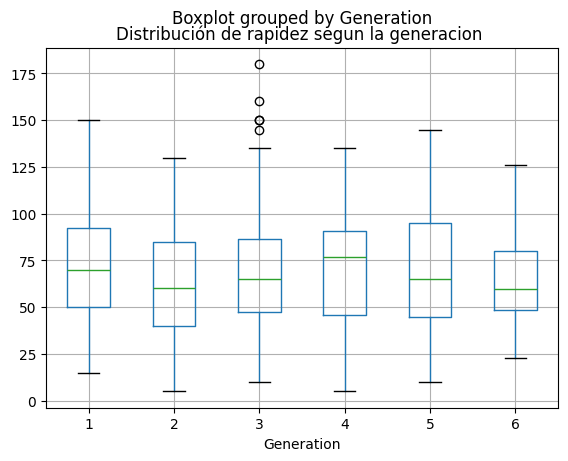

In [ ]:
df.boxplot(column="Speed", by="Generation")
plt.title("Distribución de rapidez segun la generacion ")
plt.show()


Se muestra cómo varía la velocidad de los Pokémon entre diferentes generaciones. La mediana de la velocidad cambia según la generación, indicando que algunas tienen Pokémon más rápidos en promedio. Las cajas más largas reflejan mayor variabilidad, mientras que las más cortas indican menor variabilidad. Además, los puntos fuera de las cajas representan valores atípicos, es decir, Pokémon con velocidades excepcionalmente altas o bajas. En general, el gráfico permite comparar la velocidad promedio y su variabilidad entre generaciones.









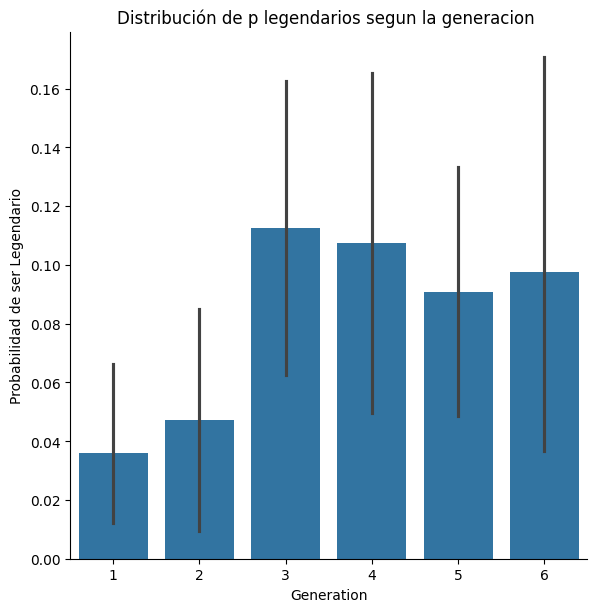

In [ ]:
g = sns.catplot(x="Generation", y="Legendary", data=df, kind="bar", height=6)
g.set_ylabels("Probabilidad de ser Legendario")
plt.title("Distribución de p legendarios segun la generacion ")
plt.show()


El gráfico "Distribución de p legendarios segun la generacion" nos muestra que la probabilidad de encontrar un Pokémon legendario varía según la generación. Algunas generaciones tienen una mayor concentración de Pokémon legendarios(1 y 3), mientras que en otras son menos frecuentes (2 y 6). Esto puede ser relevante para los jugadores que buscan capturar Pokémon legendarios, ya que les indica en qué generaciones tienen más posibilidades de encontrarlos.

que generacion tiene mas pokemos legendarios

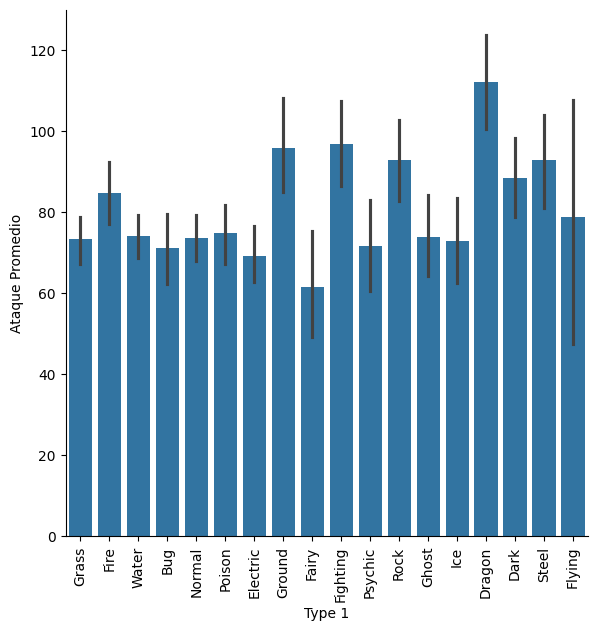

In [ ]:
g = sns.catplot(x="Type 1", y="Attack", data=df, kind="bar", height=6)
g.set_xticklabels(rotation=90)
g.set_ylabels("Ataque Promedio")
plt.show()


##Promedio de fuerza por tipo de pokemon
analizaremos las columnas "tipo 1" y "Total"

<ipython-input-31-dd98c787c6ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Type 1", y="Total", data=df, kind="bar", height=6, palette="viridis")


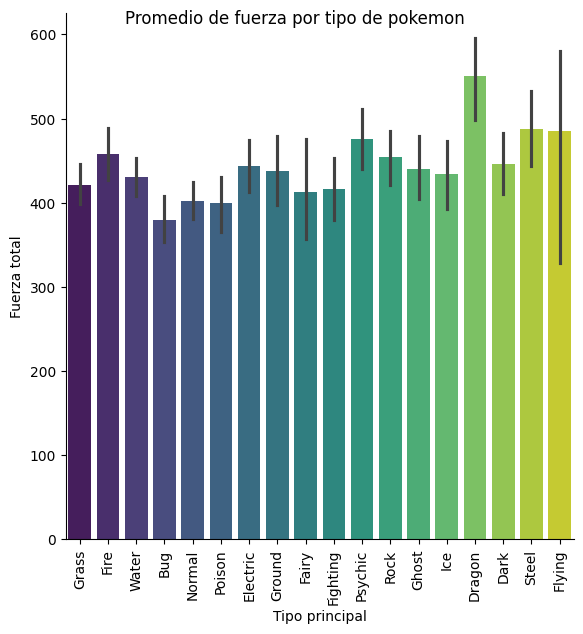

In [ ]:
g = sns.catplot(x="Type 1", y="Total", data=df, kind="bar", height=6, palette="viridis")
g.fig.suptitle("Promedio de fuerza por tipo de pokemon")
g.set_xticklabels(rotation=90)
g.set_ylabels("Fuerza total")
g.set_xlabels("Tipo principal")
plt.show()

Según el gráfico, los Pokémon de tipo Dragón y Acero presentan, en promedio, la mayor fuerza total, mientras que los de tipo Insecto tienen la menor. Observamos que el intervalo de confianza para los Pokémon de tipo Volador es bastante amplio, lo que indica una mayor incertidumbre en la estimación de su fuerza total promedio. Esto podría deberse a una mayor variabilidad en las estadísticas de los Pokémon de este tipo o a un tamaño de muestra relativamente pequeño dentro del dataset.

##Distribucion del ataque especial por tipo de pokemon
analizaremos la distribución de las columnas tipo 1 y ataque especial

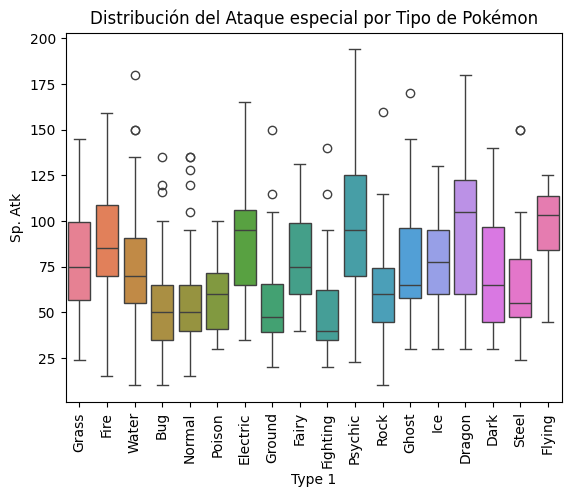

In [ ]:
sns.boxplot(x="Type 1", y="Sp. Atk", data=df,hue="Type 1")
plt.xticks(rotation=90)  # Rotar etiquetas del eje x
plt.title("Distribución del Ataque especial por Tipo de Pokémon")
plt.show()

Los Pokémon de tipo Psíquico tienen en promedio el mayor Ataque Especial, mientras que los de tipo Insecto y Normal tienen el menor. Además, los Pokémon de tipo Normal tienen más outliers (valores atípicos) que los demás.\
Los outliers en el Ataque Especial de los Pokémon de tipo Normal podrían deberse a una combinación de factores como la mayor variabilidad en la estadística, la diversidad de roles que pueden cumplir, el tamaño de la muestra, las evoluciones y la capacidad de aprender ataques especiales poderosos.

#Relacion entre Ataque y defensa de los pokemon

Hipótesis: Se espera que exista una correlación positiva entre las estadísticas de Ataque y Defensa en los Pokémon. Dado que la fuerza total de un Pokémon ("Total") se calcula sumando todas sus estadísticas individuales, incluyendo Ataque y Defensa, se presume que los Pokémon con un Ataque alto también tenderán a tener una Defensa alta.

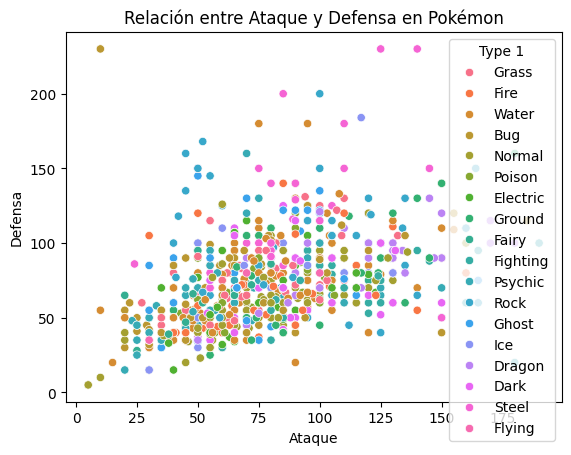

In [ ]:
sns.scatterplot(x="Attack", y="Defense",hue="Type 1", data=df)

# Añadir título y etiquetas
plt.title("Relación entre Ataque y Defensa en Pokémon")
plt.xlabel("Ataque")
plt.ylabel("Defensa")

# Mostrar el gráfico
plt.show()

Del gráfico de dispersión, podemos observar que existe una tendencia general a una correlación positiva entre Ataque y Defensa en los Pokémon. Esto significa que, en general, los Pokémon con un Ataque más alto también tienden a tener una Defensa más alta. Sin embargo, la correlación no es perfecta, ya que hay una dispersión considerable de los puntos en el gráfico. Esto indica que existen excepciones, donde algunos Pokémon tienen un Ataque alto y una Defensa baja, o viceversa. Esta dispersión podría deberse a la especialización de los Pokémon en diferentes roles, como atacantes o tanques, o a la búsqueda de un equilibrio en las estadísticas del juego.